In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import random
import itertools
from pmlb import fetch_data

In [57]:
# TODO: need to better understand the results we got:
# 1. why are the values of the accuracy ranges from 1-3
# 2. what other type of analysis do we need?
# 3. do we need to normalize like we did so far or another way
# 4. notice topics mentioned in task such as variance, scales, range etc...

data = fetch_data(dataset_name="529_pollen")

# extract ccolumn names row
column_names = data.iloc[0]
# data = data[1:]

# extract labels vector y
y = data["target"]
X = data.drop(columns=['target'])

# dimension of the data
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# print a sample and label
print(f"example of sample: \n{X.iloc[0]}")
print(f"example of label: {y.iloc[0]}")

#normalize
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)
print(f"example of sample: \n{X[0]}")

X shape: (3848, 4)
y shape: (3848,)
example of sample: 
RIDGE     -2.3482
NUB        3.6314
CRACK      5.0289
WEIGHT    10.8721
Name: 0, dtype: float64
example of label: -1.385200023651123
example of sample: 
[0.46845972 0.59506176 0.59033578 0.64302099]


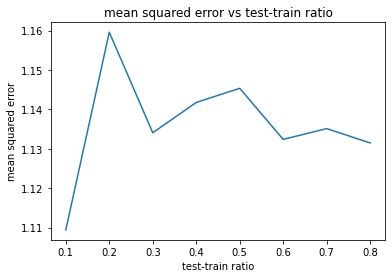

In [55]:
ratios = [0.1 * r for r in range(1, 9)]
accuracies = []
for r in ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=r, random_state=1)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    accuracies.append(mean_absolute_error(y_test, y_pred))
plt.plot(ratios, accuracies)
plt.xlabel("test-train ratio")
plt.ylabel("mean squared error")
plt.title("mean squared error vs test-train ratio")
plt.show()

In [45]:
# a function that gets train-set, test-set and k and returns the k-features from the dataset that achieve the highest accuracy
def get_k_best_features(X_train, X_test, y_train, y_test, k):
    indices_accuracy_dict = {}
    # generate all subsets of k features
    for subset in itertools.combinations(X_train.columns, k):
        regressor = LinearRegression()
        regressor.fit(X_train[list(subset)], y_train)
        y_pred = regressor.predict(X_test[list(subset)])
        indices_accuracy_dict[subset] = mean_absolute_error(y_test, y_pred)
    # return the subset and accuracy with the highest accuracy
    best_subset = max(indices_accuracy_dict, key=indices_accuracy_dict.get)
    return best_subset, indices_accuracy_dict[best_subset]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
best_subset, best_accuracy = get_k_best_features(X_train, X_test, y_train, y_test, 2)
print(f"best subset: {best_subset}, accuracy: {best_accuracy}")

best subset: ('CRACK', 'WEIGHT'), accuracy: 2.4131194419677677


In [47]:
best_subset, best_accuracy = get_k_best_features(X_train, X_test, y_train, y_test, 3)
print(f"best subset: {best_subset}, accuracy: {best_accuracy}")

best subset: ('NUB', 'CRACK', 'WEIGHT'), accuracy: 2.2050431788822933
